In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

[698.80639216 331.56635029 421.58818732 ... 335.96672498 422.16911416
 577.07167673]


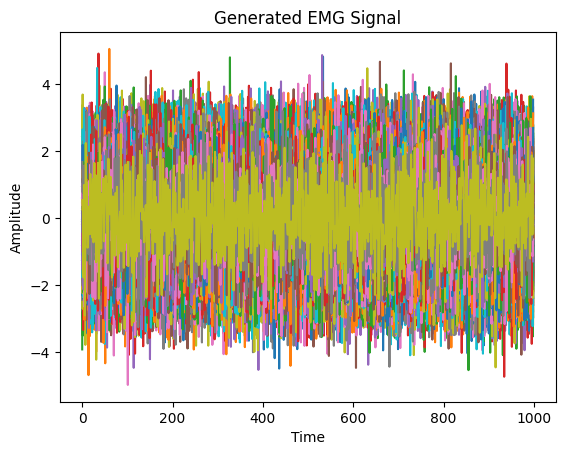

[[ 2.98806392 -0.6843365   0.21588187 ...  0.38635522  1.66774913
   0.52790872]
 [-0.73803104 -0.7273547  -0.14476674 ...  1.0382015   0.76223849
   0.23007801]
 [-0.22203011  0.35016076 -0.25565853 ...  0.25849732  1.25990756
   0.2921477 ]
 ...
 [-1.3607657   1.15516782  1.30620492 ... -1.12054826 -0.23858559
  -0.49905292]
 [-1.48793111 -0.56189946 -2.24172841 ... -1.14111238  0.26597869
  -0.47882385]
 [-1.08508072  0.68703158  0.60788388 ... -0.64033275  0.22169114
   1.77071677]]


In [3]:
num_samples = 999  # Number of samples in the generated EMG signal
num_channels = 1  # Number of channels in the EMG signal
num_clusters = 3  # Number of clusters in the Gaussian Mixture Model

def generate_zero_mean_gmm(num_clusters, num_samples):
    # Generate covariance matrices for each cluster
    covariances = [np.eye(num_samples) for _ in range(num_clusters)]  # Identity matrix as covariance for each cluster

    # Generate weights for each cluster (uniform weights)
    weights = np.ones(num_clusters) / num_clusters

    # Generate GMM samples
    gmm_samples = np.concatenate([
        multivariate_normal.rvs(mean=np.zeros(num_samples), cov=covariances[i], size=int(num_samples * weights[i]))
        for i in range(num_clusters)
    ])

    return gmm_samples

# Get force input from the user
force_input = 10


# Predict rms and hofms
accurate_rms = 0.18207145
accurate_hofms = 0.18207145
gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples

emg_signal = accurate_hofms * accurate_rms + gmm_samples  # Combine HOFMs, RMS, and GMM
time = np.arange(num_samples)

# convert to combatible format
input_array = emg_signal
output_array = input_array * 100 + 400 #to shift range
print(output_array.flatten())

plt.plot(time, emg_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated EMG Signal')
plt.show()
print(emg_signal)


